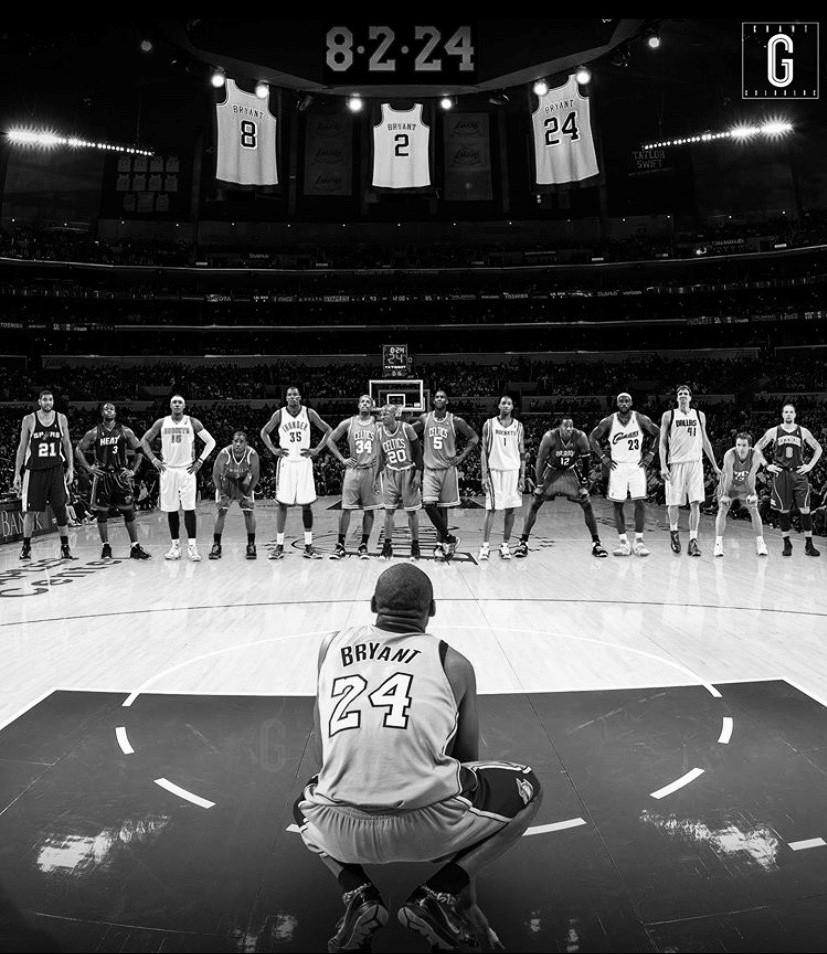

## I have self-doubt. I have insecurity. I have fear of failure. I have nights when I show up at the arena and I’m like, ‘My back hurts, my feet hurt, my knees hurt. I don’t have it. I just want to chill.’ We all have self-doubt. You don’t deny it, but you also don’t capitulate to it. You embrace it.

# Introduction

Kobe Bryant was a global icon. For 20 years, he bled the Purple and Gold and was able to bring home 5 championships. He is the personification of the end product of god-given talent mixted with an unrelentless work ethic. He was widely known for being the closest comparison to Michael Jordan, mirroring his scoring prowess, relentless defense, and high IQ of the game. Unfortunately, Kobe is no longer with us however his memory and legend continues to live on. This effort will take in consideration the data of all the shots that he took over his 20 year career.

In [1]:
# Importing all neccessary libraries for visual and analytical purposes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pingouin as pg
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import numpy as np
from tabulate import tabulate
import pycountry
import geopandas
import pandoc

C:\Users\angel.maldonado\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [51]:
mamba = pd.read_csv('Data/data.csv')

In [3]:
mamba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  int64  
 15  shot_type           25697 non-null  object 
 16  shot

In [4]:
mamba.shape

(25697, 25)

In [5]:
mamba.shot_id.count()

25697

In [61]:
mamba.action_type.unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Reverse Dunk Shot', 'Slam Dunk Shot',
       'Driving Layup Shot', 'Turnaround Jump Shot', 'Reverse Layup Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Jump Hook Shot',
       'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Tip Shot',
       'Running Reverse Layup Shot', 'Driving Finger Roll Layup Shot',
       'Fadeaway Bank shot', 'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Turnaround Bank shot', 'Reverse Slam Dunk Shot',
   

In [64]:
mamba.isnull().sum(axis=0)

action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
dtype: int64

In [73]:
mamba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  int64  
 15  shot_type           25697 non-null  object 
 16  shot

In [9]:
Seasons = mamba.groupby(['season'])['shot_id'].count()
Seasons

season
1996-1997     383
1997-1998     810
1998-1999     765
1999-2000    1612
2000-2001    1274
2001-2002    1709
2002-2003    1852
2003-2004    1371
2004-2005    1127
2005-2006    1924
2006-2007    1579
2007-2008    1819
2008-2009    1851
2009-2010    1772
2010-2011    1521
2011-2012    1416
2012-2013    1328
2013-2014      59
2014-2015     593
2015-2016     932
Name: shot_id, dtype: int64

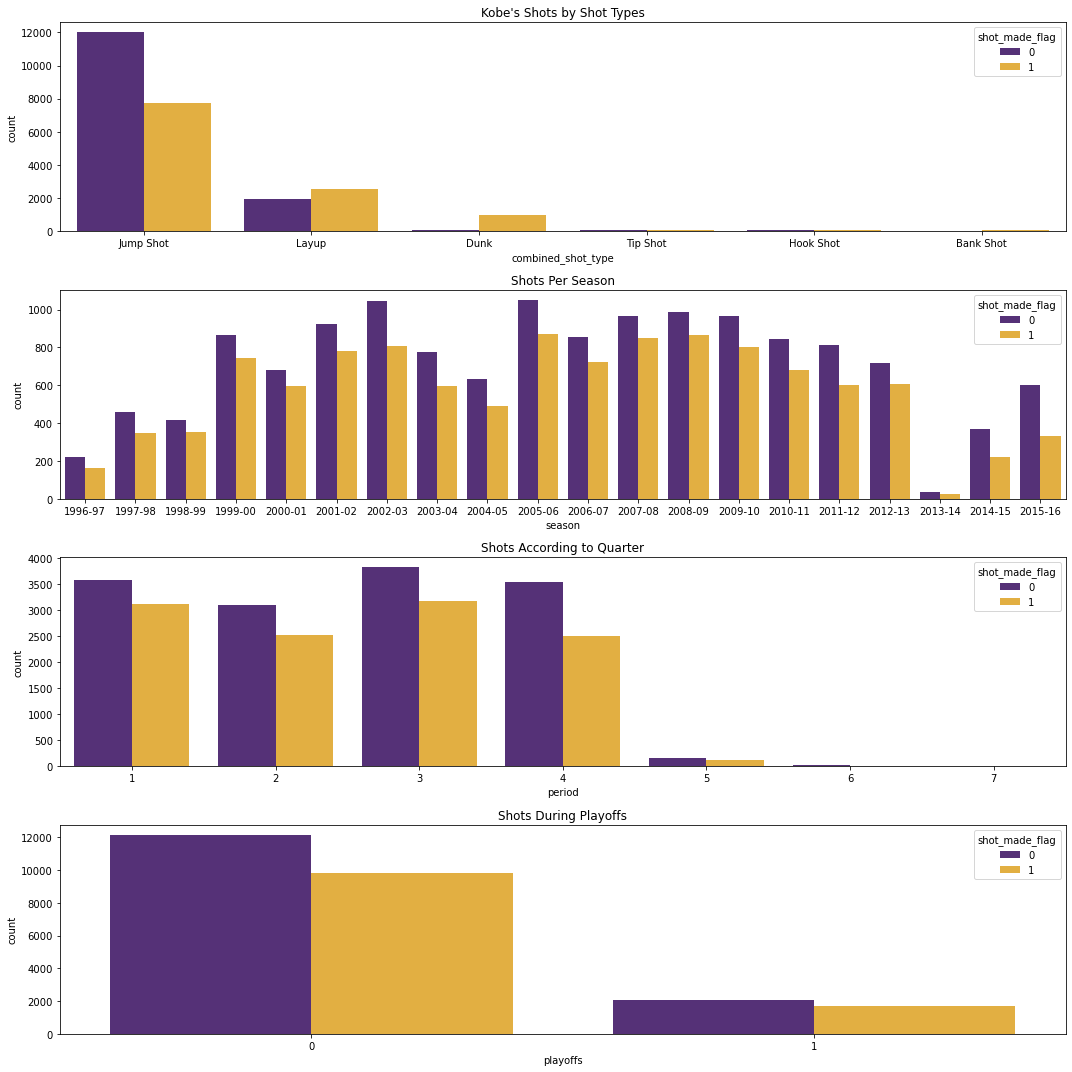

In [53]:
f, axarr = plt.subplots(4, figsize=(15, 15))

sns.countplot(x="combined_shot_type", hue="shot_made_flag", palette= ("#552583", "#FDB927"), data=mamba, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[3])

axarr[0].set_title("Kobe's Shots by Shot Types")
axarr[1].set_title('Shots Per Season')
axarr[2].set_title('Shots According to Quarter')
axarr[3].set_title('Shots During Playoffs')

plt.tight_layout()
plt.show()

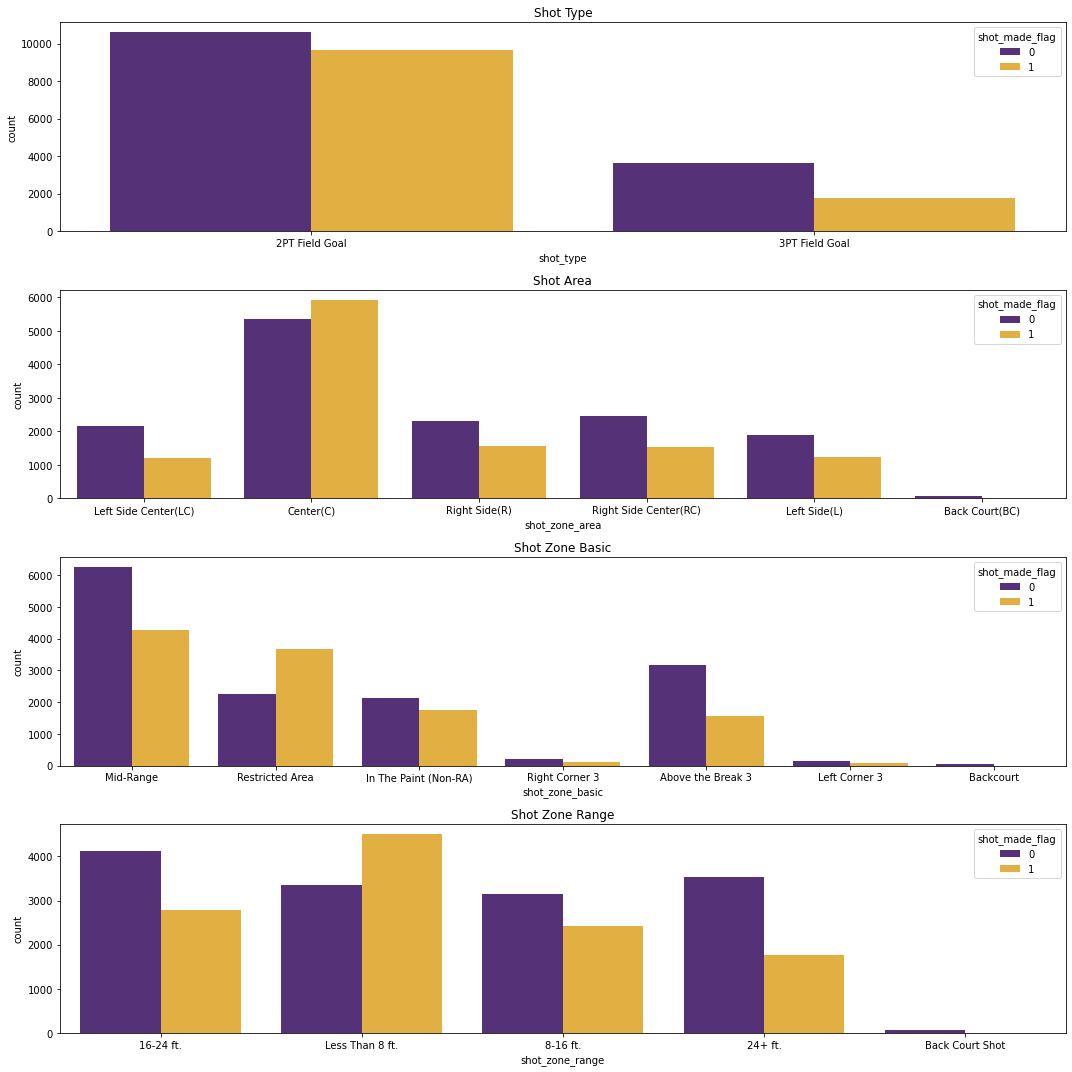

In [54]:
f, axarr = plt.subplots(4, figsize=(15, 15))

sns.countplot(x="shot_type", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[0])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[1])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[2])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[3])

axarr[0].set_title('Shot Type')
axarr[1].set_title('Shot Area')
axarr[2].set_title('Shot Zone Basic')
axarr[3].set_title('Shot Zone Range')

plt.tight_layout()
plt.show()

In [ ]:
8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  int64  
 15  shot_type           25697 non-null  object 
 16  shot_zone_area      25697 non-null  object 
 17  shot_zone_basic     25697 non-null  object 
 18  shot_zone_range     25697 non-null  object 
 19  team_id             25697 non-null  int64  
 20  team_name           25697 non-null  object 
 21  game_date           25697 non-null  object 
 22  matchup             25697 non-null  object 
 23  opponent            25697 non-null  object 
 24  shot_id             25697 non-null  int64  
f, axarr = plt.subplots(4, figsize=(15, 15))

sns.countplot(x="shot_type", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[0])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[1])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[2])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=mamba,palette= ("#552583", "#FDB927"), ax=axarr[3])

axarr[0].set_title('Shot Type')
axarr[1].set_title('Shot Area')
axarr[2].set_title('Shot Zone Basic')
axarr[3].set_title('Shot Zone Range')

plt.tight_layout()
plt.show()

NameError: name 'Line2D' is not defined

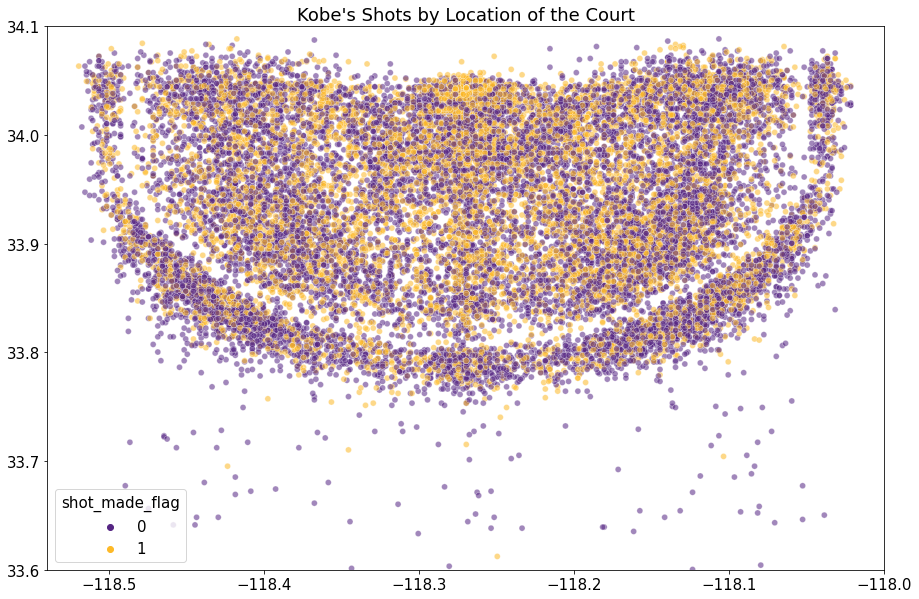

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
scatter = sns.scatterplot(x=mamba["lon"], y=mamba["lat"], hue=mamba['shot_made_flag'],
                                    alpha=0.55, ax=ax, palette=("#552583", "#FDB927"))
scatter.set_xlim(left=-118.54, right=-118)
scatter.set_ylim(bottom=33.6, top=34.1)
ax.set_title("Kobe's Shots by Location of the Court")
ax.set_xlabel("")
ax.set_ylabel("")
legend_elemnts = [Line2D([0], [0], marker="o", color='w', label="Made",
                         markerfacecolor="#FDB927", markersize=10),
                  Line2D([0], [0], marker="o", color='w', label="Missed",
                         markerfacecolor="#552583", markersize=10)]
plt.legend(handles=legend_elemnts, title="Shot missed/made", ncol=2, fontsize='small', fancybox=True);